## Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#load dataset
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
price=pd.DataFrame(boston.target, columns = ['MEDV'])
df = bos.join(price)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#print(boston.DESCR)

In [5]:
"""plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)"""

'plt.figure(figsize = (12,6))\nsns.heatmap(df.corr(),annot = True)'

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(337, 13)
(169, 13)


## Building the model

#### OLS Stats.api model

In [7]:
import statsmodels.formula.api as smf
ols_model = smf.ols(formula='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=df).fit()
ols_model.conf_int()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        22:48:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From the OLS statsmodels summary, the p valuue, R value and F-value has been calculated. Considering the p-value=0.05, eliminate features which have p value more than 0.05. "INDUS", "AGE" are the only features with high p-values. So, these features are not significant in determining the target value**

In [8]:
#!pip install statsmodels

In [9]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [10]:
X.drop(labels=["AGE", "INDUS"], axis=1, inplace=True)

In [11]:
ols_model = smf.ols(formula='MEDV ~ CRIM+ZN+CHAS+NOX+RM+RAD+DIS+TAX+PTRATIO+B+LSTAT', data=df).fit()
ols_model.conf_int()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          5.54e-137
Time:                        22:48:58   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=X.values
y=y.values

#train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(337, 11)
(169, 11)


#### Simple Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[24.71 22.6 ]
 [24.21 50.  ]
 [29.49 23.  ]
 [12.08  8.3 ]
 [21.19 21.2 ]
 [19.1  19.9 ]
 [20.52 20.6 ]
 [21.14 18.7 ]
 [19.   16.1 ]
 [20.72 18.6 ]
 [ 5.93  8.8 ]
 [17.12 17.2 ]
 [17.   14.9 ]
 [ 5.34 10.5 ]
 [40.44 50.  ]
 [32.34 29.  ]
 [22.53 23.  ]
 [36.82 33.3 ]
 [30.99 29.4 ]
 [23.09 21.  ]
 [24.65 23.8 ]
 [24.81 19.1 ]
 [20.69 20.4 ]
 [30.48 29.1 ]
 [22.18 19.3 ]
 [11.29 23.1 ]
 [17.43 19.6 ]
 [18.14 19.4 ]
 [35.68 38.7 ]
 [20.88 18.7 ]
 [18.31 14.6 ]
 [17.6  20.  ]
 [19.56 20.5 ]
 [23.82 20.1 ]
 [29.33 23.6 ]
 [19.41 16.8 ]
 [10.81  5.6 ]
 [25.23 50.  ]
 [18.27 14.5 ]
 [15.48 13.3 ]
 [25.89 23.9 ]
 [20.47 20.  ]
 [22.05 19.8 ]
 [15.75 13.8 ]
 [22.58 16.5 ]
 [25.02 21.6 ]
 [19.55 20.3 ]
 [22.75 17.  ]
 [ 9.22 11.8 ]
 [24.36 27.5 ]
 [21.26 15.6 ]
 [16.98 23.1 ]
 [24.54 24.3 ]
 [29.19 42.8 ]
 [13.46 15.6 ]
 [21.2  21.7 ]
 [20.38 17.1 ]
 [14.85 17.2 ]
 [15.4  15.  ]
 [22.11 21.7 ]
 [17.01 18.6 ]
 [21.3  21.  ]
 [32.87 33.1 ]
 [31.27 31.5 ]
 [17.71 20.1 ]
 [33.04 29.8 ]
 [18.53 15

In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
print("The MSE is", mse)
print("THe RMSE is", np.sqrt(mse))

# adjusted R-Squared function to check for any feature that might blow our model out of proportion
def adj_r2(x0,y0):
    r2 = regressor.score(x0,y0)
    n = x0.shape[0]
    p = x0.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#from sklearn.metrics import r2_score
print("The model R2 score for training set is", regressor.score(X_train, y_train))
print("The model adjusted R2 score for training set is", adj_r2(X_train,y_train))

print("The model R2 score for test set is",regressor.score(X_test, y_test))
print("The model adjusted R2 score for test set is", adj_r2(X_test,y_test))


# print intercept and coefficients
print("Model intercept is", regressor.intercept_)
print("Model coefficients are", regressor.coef_)

The MSE is 26.203377464160234
THe RMSE is 5.118923467308359
The model R2 score for training set is 0.7679351006196389
The model adjusted R2 score for training set is 0.7600805963329189
The model R2 score for test set is 0.671409524468376
The model adjusted R2 score for test set is 0.6483872618515106
Model intercept is 41.29800135647996
Model coefficients are [-1.17e-01  4.89e-02  2.50e+00 -1.78e+01  3.60e+00 -1.54e+00  2.53e-01
 -1.09e-02 -1.05e+00  5.93e-03 -5.31e-01]


Our r2 score is 76.79% and adj r2 is 76.00% for our training set, so looks like we are not being penalized by use of any feature.\
Let's check how well model fits the test data.

So it looks like our model r2 score is less on the test data\
But, through adjusted r2 score we checked and found no feature that blows our model out of proportion\
Let's see if our model is overfitting our training data.

#### REGULARIZATION

#### Lasso Regression

In [15]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00037750187001649714

In [16]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)
print("The r2 score for lasso is", lasso_reg.score(X_test, y_test))

The r2 score for lasso is 0.6714069732534584


our r2_score for test data (66.93%) comes same as before using regularization (67.14%). So, it is fair to say our Simple Linear Regression model did not overfit the data.

#### Ridge Regression

In [17]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.14872544545650235

In [18]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)
print("The r2 score for ridge model is", ridge_model.score(X_test, y_test))

The r2 score for ridge model is 0.6712629565032417


we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

#### ElasticNetCV

In [19]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)
elasticCV.alpha_

1.5508790673511257

In [20]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [21]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)
print("The Elastic Net CV score is", elasticnet_reg.score(X_test, y_test))

The Elastic Net CV score is 0.600320960903292


So, we can see by using different type of regularization, we still are getting the same r2 score. That means our model has been well trained over the training data and there is no overfitting.

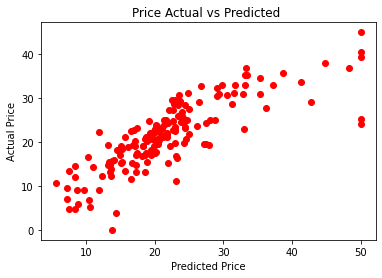

In [22]:
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Price Actual vs Predicted ')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

/home/allyson/anaconda3/envs/practice/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


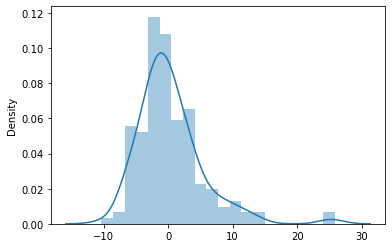

In [23]:
error = y_test - y_pred
sns.distplot(error)